# Network metrics and analysis

In [28]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Centrality metrics

The following metrics are available: Degree, Closeness, Betweenness, Eigenvector

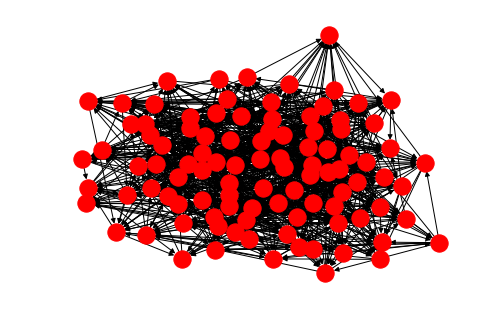

In [30]:
#let's start with a random graph:
G=nx.gnm_random_graph(100,1000)
GD=nx.gnm_random_graph(100,1000,directed=True)
nx.draw(GD)

## Degree centrality

In [31]:
#it works for directed and undirected graphs the same way, returing 
#a dictionary whose elements are the nodes and their centralities
G_deg_cent=nx.degree_centrality(G)


In [32]:
# For directed graphs we also get in_degree and out_degree,
#producing as output the same dictionary
GD_in_deg=nx.in_degree_centrality(GD)
GD_out_deg=nx.out_degree_centrality(GD)


## Betweennes centrality

betweenness_centrality(G, k=None, normalized=True, weight=None, endpoints=False, seed=None)

Betweenness centrality of a node v is the sum of the fraction of all-pairs shortest paths that pass through v:

$c_B(v) =\sum_{s,t \in V} \frac{\sigma(s, t|v)}{\sigma(s, t)}$

where V is the set of nodes, $\sigma(s, t)$ is the number of shortest (s, t)-paths, and $\sigma(s, t|v)$ is the number of those paths passing through some node v other than s, t. If $s = t$, $\sigma(s, t) = 1$, and if $v \in {s, t}$, $\sigma(s, t|v) = 0$.

k, integer: if given use k node samples to estimate the betweenness, the higher, the better (and slower :) )
normalized: if True normalize values
weight: use for weighted graphs
endpoints: include or not endpoints in the shortes path computation

In [34]:
G_bet=nx.betweenness_centrality(G)

#this hold for nodes, you can also compute bet. for edges with:

G_e_bet=nx.edge_betweenness_centrality(G)

# Both algorithms return a dictionary of nodes and edges

## Eigenvector centrality

Eigenvector centrality computes the centrality for a node based on the centrality of its neighbors. The eigenvector centrality for node i is

$\mathbf{Ax} = \lambda \mathbf{x}$

where $A$ is the adjacency matrix of the graph $G$ with eigenvalue $\lambda$. By virtue of the Perron–Frobenius theorem, there is a unique and positive solution if $\lambda$ is the largest eigenvalue associated with the eigenvector of the adjacency matrix $A$.

Parameters:	

**G** (graph) – A networkx graph  
**max_iter** (integer, optional) – Maximum number of iterations in power method.  
**tol** (float, optional) – Error tolerance used to check convergence in power method iteration.  
**nstart** (dictionary, optional) – Starting value of eigenvector iteration for each node.      
**weight** (None or string, optional) – If None, all edge weights are considered equal. Otherwise holds the name of the edge attribute used as weight.  

In [35]:
G_eig=nx.eigenvector_centrality(G)
GD_eig=nx.eigenvector_centrality(GD)

In [36]:
G_eig

{0: 0.12021905825092573,
 1: 0.13336587641541994,
 2: 0.09791457762212209,
 3: 0.09205270372309615,
 4: 0.07947532647146734,
 5: 0.1125613180539349,
 6: 0.09531102172074041,
 7: 0.10854796024464441,
 8: 0.09409518004207638,
 9: 0.12511363355251312,
 10: 0.11933583834596362,
 11: 0.05243976779629915,
 12: 0.100387942449415,
 13: 0.09338254143793813,
 14: 0.09539735503193385,
 15: 0.10274292477158806,
 16: 0.10956760181651566,
 17: 0.10506011003697817,
 18: 0.1335138454036048,
 19: 0.12218059277054703,
 20: 0.10186322451647153,
 21: 0.0843550080397624,
 22: 0.0929790612380205,
 23: 0.07686815112705414,
 24: 0.08462630153453617,
 25: 0.09810955616346066,
 26: 0.09369697010767604,
 27: 0.09805324536514533,
 28: 0.12618604207804263,
 29: 0.0908144542990092,
 30: 0.09675686711360776,
 31: 0.1426745348749772,
 32: 0.09633867862585622,
 33: 0.0964306164493711,
 34: 0.07344413095992965,
 35: 0.10487805843073314,
 36: 0.08805954123709758,
 37: 0.10853140753597018,
 38: 0.11761401246076748,
 39: 

## Exercise

Generate a Barabasi-Albert Graph with 200 nodes and compare the centrality metrics, plotting the node's metrics distributions.

Remark the differences (if any) among the random graph $G$ generated in this lecture.

## Link Analysis of Directed networks

NetworkX also contains specific algoriths for ranking nodes in directed networks, we focus on PageRank and Hits.


### PageRank

    pagerank(G, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='weight', dangling=None)

PageRank computes a ranking of the nodes in the graph G based on the structure of the incoming links. It was originally designed as an algorithm to rank web pages (i.e. you are famous because others think you are).

The eigenvector calculation is done by the power iteration method and has no guarantee of convergence. The iteration will stop after *max_iter* iterations or an error tolerance of *number_of_nodes(G) x tol* has been reached.

The PageRank algorithm was designed for directed graphs but this algorithm does not check if the input graph is directed and will execute on undirected graphs by converting each edge in the directed graph to two edges.

**G** (graph) – A NetworkX graph. Undirected graphs will be converted to a directed graph with two directed edges for each undirected edge.  
**alpha** (float, optional) – Damping parameter for PageRank, default=0.85.  
**personalization** (dict, optional) – The “personalization vector” consisting of a dictionary with a key for every graph node and nonzero personalization value for each node. By default, a uniform distribution is used.  
**max_iter** (integer, optional) – Maximum number of iterations in power method eigenvalue solver.  
**tol** (float, optional) – Error tolerance used to check convergence in power method solver.  
**nstart** (dictionary, optional) – Starting value of PageRank iteration for each node.  
**weight** (key, optional) – Edge data key to use as weight. If None weights are set to 1.  
**dangling** (dict, optional) – The outedges to be assigned to any “dangling” nodes, i.e., nodes without any outedges.   


The dict key is the node the outedge points to and the dict value is the weight of that outedge. By default, dangling nodes are given outedges according to the personalization vector (uniform if not specified). This must be selected to result in an irreducible transition matrix (see notes under google_matrix). It may be common to have the dangling dict to be the same as the personalization dict.

In [37]:
GD_pr=nx.pagerank(GD)

#As before it returns a dictionary:
GD_pr

{0: 0.007854308351880376,
 1: 0.010784231434354273,
 2: 0.010741280696107471,
 3: 0.011492290987540212,
 4: 0.008932601202381554,
 5: 0.01127214412734597,
 6: 0.006915057325077051,
 7: 0.011050962143334937,
 8: 0.007534938493843397,
 9: 0.014430322444907525,
 10: 0.01092012339651605,
 11: 0.011577557302218579,
 12: 0.012026630089291343,
 13: 0.006108763797735888,
 14: 0.0072623811165517995,
 15: 0.0188910767789882,
 16: 0.01581446426721013,
 17: 0.009874088975444065,
 18: 0.006622661089549802,
 19: 0.007822132312294025,
 20: 0.010255464622311023,
 21: 0.006368560146478595,
 22: 0.010096105305190513,
 23: 0.01350678324711914,
 24: 0.014414737479949428,
 25: 0.010122770065867391,
 26: 0.010526003777520717,
 27: 0.012648966345988968,
 28: 0.007500713375463674,
 29: 0.005263119976414472,
 30: 0.010170517374530846,
 31: 0.00607920394759009,
 32: 0.009207120785146187,
 33: 0.009083022103462545,
 34: 0.009321527980213481,
 35: 0.013602014060103767,
 36: 0.007245436747772179,
 37: 0.0090463246

## Hits - finding Hubs and Authorities 

    hits(G, max_iter=100, tol=1e-08, nstart=None, normalized=True)

The HITS algorithm computes two numbers for a node. Authorities estimates the node value based on the incoming links. Hubs estimates the node value based on outgoing links.

**G** (graph) – A NetworkX graph  
**max_iter** (interger, optional) – Maximum number of iterations in power method  
**tol** (float, optional) – Error tolerance used to check convergence in power method iteration  
**nstart** (dictionary, optional) – Starting value of each node for power method iteration  
**normalized** (bool (default=True)) – Normalize results by the sum of all of the values  

Returns:  	
**(hubs,authorities)** – Two dictionaries keyed by node containing the hub and authority values.

In [27]:
GD_ha=nx.hits(GD)
